# Status Quo: Where are we ?

We have an HMM model and parameters (emissions, transitions and initial probability).

Remember the travel analogy: we used countries (as hidden states) and food (as observables) - but we could have chosen many other stories.

In [1]:
import numpy as np
pi=np.array( [0.75, 0.25] )                          # initial state probability
P =np.array([ [0.8, 0.2], [0.1, 0.9] ])              # transition probabilites
E =np.array([ [0.7, 0.2, 0.1], [0.1, 0.1, 0.8] ])    # emission probabilities

With these parameters we can generate state sequences $Z$ and observations $X$, but in typical applications the state sequences $Z$ are unobserved. We should think about $Z$ probabilistically. Until now we have encountered the following distributions:

- "the joint" $P(X,Z)$: nice theoretical form (graphical model), but in general not calculable ($Z$ unknown)
- "scoring" $P(X)$: how to sum over all $Z$ efficiently $\to$ **Forward algorithm**
- "monitoring" $P(Z_t=i|X_{1:t})$: similar to $P(X)$ but with extra normalization (Bayesian update)

Naively, these probabilites are very expensive to calculate $\to$ use efficient **recursion** (thanks to the Markov property).

Remember our remaining goals:

- $P(Z_t=i| X)$ what are the state probabilities at $t$ given **all** observations $X=X_{1:T}$ (past, present and future)
- $argmax_Z P(Z|X)$ what is the most likely path $Z$
- $argmax_\Theta P(\Theta|X)$ what are the best parameters 

# $P(Z_t | X_{1:T})$ : Hindsight (Forward-Backward)

## The Algorithm

Now we want to calculate the state probability at time $t$ given **all** observations $X_{1:T}$. This is also called *smoothing* or posterior decoding.

$$
\gamma_{ti} = P(Z_t=i|X_{1:T}) = Pr(Z_t=i| X_{1:t} X_{t+1:T}) \propto  Pr(Z_t=i|X_{1:t}) \cdot Pr(X_{t+1:T}|Z_t=i)
$$

The first factor is $\alpha_{ti}$ from the **Forward Algorithm**. The second factor denotes the likelihood of future observations, given $Z_t$. 

It can be calculated analoguously by the **Backward Algorithm**

$$
\begin{align}
\beta_{ti} &= Pr( X_{t+1:T} | Z_t=i) \\
&= \sum_k Pr(X_{t+2:T}|Z_{t+1}=k) Pr(X_{t+1} | Z_{t+1}=k) Pr(Z_{t+1=}k|Z_t=i) \\
&= \sum_k \beta_{t+1 k} Pr(X_{t+1}|Z_{t+1}=k) Pr(Z_{t+1=}k|Z_t=i)
\end{align}
$$






$$
\mbox{Initalisation (t=T):}~~~ \beta_{Ti} = 1~~~~~~~~
\mbox{Termination (t=1):}~~~\sum_i \beta_{1i} = Pr(X) \\
$$

## Summary

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/HMM_ForwardBackward.jpg",  width="1200">
</div>

Ultimately this leads to **Forward-Backward Algorithm** (+ Normalization)

$$
Pr(Z_t = i | X_{1:T}) = \gamma_{ti} = \frac{\alpha_{ti} \beta_{ti}}{\sum_k \alpha_{tk} \beta_{tk}} 
$$



## Uses

- assign a posterior state probabilities to each time  
- sample $Z_t|X$ beyond just the best $Z_t$
- parameter estimates: couple with EM (Baum-Welch)

# The good news: There is software

Bad news: there are many different packages. Here we use hmmlearn.

In [2]:
%%script echo install only once
!pip install hmmlearn

     |████████████████████████████████| 129 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 30.8 MB 25.8 MB/s eta 0:00:01   |█▍                              | 1.4 MB 4.5 MB/s eta 0:00:07     |██▎                             | 2.2 MB 4.5 MB/s eta 0:00:07     |████▊                           | 4.5 MB 4.5 MB/s eta 0:00:06     |██████▊                         | 6.5 MB 3.7 MB/s eta 0:00:07     |████████                        | 7.6 MB 3.7 MB/s eta 0:00:07     |█████████▏                      | 8.8 MB 3.7 MB/s eta 0:00:06     |████████████████▍               | 15.8 MB 3.8 MB/s eta 0:00:04     |████████████████▋               | 16.0 MB 3.8 MB/s eta 0:00:04     |█████████████████████▏          | 20.4 MB 3.8 MB/s eta 0:00:03
     |████████████████████████████████| 306 kB 6.7 MB/s eta 0:00:01


## HMMlearn: Generating Sequences and Observations

In [3]:
from hmmlearn import hmm

np.random.seed(42)                       # only for reproducibiltiy

# define HMM and set parameters
model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = pi                    # initial state prob
model.transmat_  = P                     # transition prob
model.emissionprob_ = E                  # emission prob

# generate sequence
X,Z = model.sample(1000)                   # c.f. Z, X = generate_HMM(P,pi,E)
print('states Z       =',*Z.flatten())
print('observations X =',*X.flatten())

states Z       = 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0

## HMMlearn: Calculating $Pr(X)$

Remember that the Forward Algorithm is used to circumvent the difficult calculation

$$
Pr(X) = \sum_Z Pr(X,Z)
$$

In [4]:
score = model.score(X) 
print('score Pr(X) = ', score)


score Pr(X) =  -903.6449970237446


**Discussion**: What's the meaning of this score? Consult the help pages to find out more about this score.

## HMMlearn: Calculating $Pr(Z_t=i | X)$ 

In [5]:
PrZ = model.predict_proba(X) 

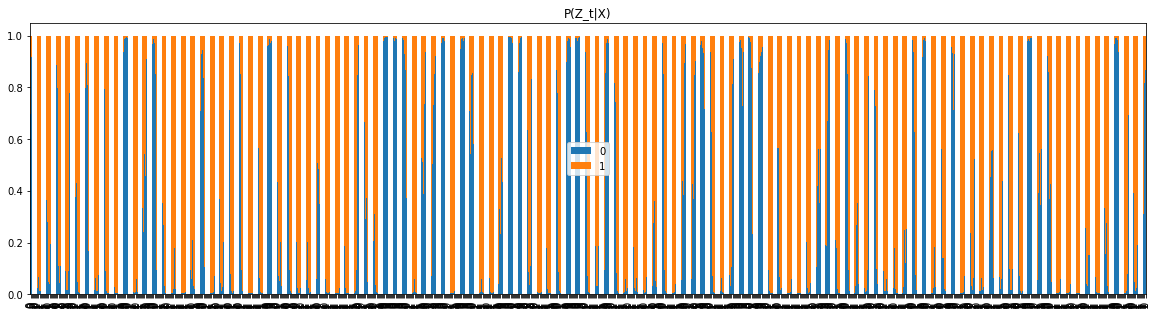

In [8]:
# use Pandas for dataframes and powerful plotting
import pandas as pd
df=pd.DataFrame(data=PrZ,index=Z)  # convert PrZ to dataframe and add true Z as index
pp=df.plot(kind='bar', stacked=True, figsize=(20,5), title='P(Z_t|X)')

This is how the posterior probability of $Z_t =i$ changes over time. 

**Individual task (15 min)**: Take some time and try to understand the results and data structures above.
Does the plot make sense? If this shows the "posterior" state probability; what is the "prior" state probability and how could you obtain it?

# Decoding: Finding the Best State Sequence

## Option 1: Maximal Posterior

The above calculation $Pr(Z_t=i|X_{1:T})$ suggests a simple way to define the "best" state sequence. 

For example, one might simply collect the state sequence with the largest $Pr(Z_t=i|X)$ for each time $t$:

$$
Z_t = \underset{i}{argmax} Pr(Z_t=i | X)
$$

**Discussion**: 

Refer back to the above figure for $Pr(Z_t=i|X)$ and see whether this is a good prescription (remember that in this case we know the true $Z$). What could be possible problems with it?



## Option 2: Viterbi Decoding

Using the maximal posterior (as above) may lead to forbidden state transition $Z_t \to Z_{t+1}$, where the corresponding transition probability is 0.

For this reason, we are also looking for a **valid path** $Z_{1:T}$ that maximizes the conditional probability given all observations $X_{1:T}$.

$$
Z^\ast = \underset{Z}{argmax} Pr(Z|X) \propto \underset{Z}{argmax} Pr(Z,X) \\
$$

### Recursion: again

Again we will utilize the **recursion principle** - this time assuming that for a given time $t$ we know
- the path with maximum probability that ends in $Z_t=i$
- the last link of that path that connects  to $Z_t=i$, i.e. it's origin.

**Goal:** maximize over all previous

$$
\mu_{ti} = \max_{Z_{1:t-1}} Pr(Z_t=i, Z_{1:t-1}, X_{1:t})
$$

For time $t+1$ we can use the usual propagation of probabilities.

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/HMM_Viterbi.jpg",  width="1500">
</div>

Notice:

- This is the Forward Algorithm with $\sum_k \to \max_k$
- $\max_i \mu_{Ti} = \max_{Z} Pr(Z,X)$
- forbidden paths would have some transitions $Pr(Z_{t+1}=j | Z_{t}=i) = 0 \longrightarrow$ they would never be maximal.
- complexity: $O(T) \ll O(N^T)$
- also need to keep track of last links $\lambda_{ti}$ (the maximizing transitions) $\to$ back-tracking


## HMMlearn: Decoding

The hmmlearn implementation is very easy to use

In [11]:
_, Zv = model.decode(X)
Zv.shape

(1000,)

In [15]:
#%%script echo This would be an alternative approach (also with hmmlearn)
# alternatives
PrZ = model.predict_proba(X)    # maximum posterior probability 
Zm = PrZ.argmax(axis=1)         # get maximum
Zv = model.predict(X)            # Viterbi pathh

**Group Task (30 min)**: 

1. Sample the HMM model again with T=50
2. Consult the help for model.decode() and identify two different methods to predict a hidden state sequence for a given X.
3. Try both algorithms and look for differences in the prediced sequences.
4. Compare the predicted state sequence with the "hidden" sequence Z
5. Increase the generated sequence length to 1000 and repeat the comparisons.

In [18]:
#%%script echo edit before execution
np.random.seed(42)
T=1000
X,Z = model.sample(T)

# get two different "best" paths from two methods 
_, Zv = model.decode(X, algorithm='viterbi')
_, Zm = model.decode(X, algorithm='map')

# Check differences
print('differences (Zv-Z):  ', np.sum(Zv != Z))
print('differences (Zm-Z):  ', np.sum(Zm != Z))
print('differences (Zv-Zm): ', np.sum(Zv != Zm))

differences (Zv-Z):   104
differences (Zm-Z):   106
differences (Zv-Zm):  12


# HMMLearn: Fitting

This is by far the comoutationally most demanding task

In an *observable* Markov model, the transition probabilities could be estimated from the observed transition frequencies $(Z_t=i \to Z_{t+1}=j)$
$$
\hat{P}_{ij} = \frac{N_{ij}}{\sum_l N_{il}}
$$

If $Z$ was observable, one could define similar estimates for the emission probabilities $\hat E_{ik}$ from observed emission frequencies $(Z_t=i \to X_{t}=k)$
However, the hidden states $Z$ are **not** observable.




## If Z was observable (skip)

In [ ]:
L=len(Z)    # length of observed sequence

trans={}
for i in range(L-1):
  pair = '{}->{}'.format(Z[i],Z[i+1])
  trans[pair] = trans.get(pair, 0) + 1

emiss={}
for i in range(L):
  pair = '{}->{}'.format(Z[i],X[i])
  emiss[pair] = emiss.get(pair, 0) + 1


print('transitions:')
for k, v in trans.items():
  print(k,v)

print('emissions:')
for k, v in emiss.items():
  print(k,v)


transitions:
0->0 15
0->1 5
1->1 24
1->0 5
emissions:
0->[2] 5
0->[0] 12
0->[1] 4
1->[2] 23
1->[1] 3
1->[0] 3


**Discussion:** Why would this not necessarily be a good estimate? (Longer chains vs multiple chains)

## If Z is hidden (Baum-Welch) 

1. Initialize all probabilities randomly
2. Re-estimation: change parameters iteratively to maximize $Pr(X)$

The re-estimation procedure makes clever use of Forward and Backward algorithm, but one could also use gradient techniques for optimization.

The iteration will converge to **local maxima** and will generally depend on the initial conditions, and the number of iterations.





In [48]:
#np.random.seed(42)
model_fit = hmm.MultinomialHMM(n_components=2, n_iter=1000000)
model_fit.fit(X)
score = model_fit.score(X)
print('score: ', score)


print(model_fit.transmat_)
print(P)
print('----')
print(model_fit.emissionprob_)
print(E)

score:  -900.9735532348614
[[0.76222418 0.23777582]
 [0.11952197 0.88047803]]
[[0.8 0.2]
 [0.1 0.9]]
----
[[0.72848756 0.2290015  0.04251094]
 [0.11486968 0.09113708 0.79399324]]
[[0.7 0.2 0.1]
 [0.1 0.1 0.8]]
